<a href="https://colab.research.google.com/github/SergeiVKalinin/PNNL_ML_2024/blob/main/Day_5_DNN_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Tutorial notebook for the Summer PNNL ML Course
- Instructor Sergei V. Kalinin

Based on the
- Rowel Atienza book: https://subscription.packtpub.com/book/programming/9781838821654/pref

- Francois Chollet book: https://livebook.manning.com/book/deep-learning-with-python-second-edition/deep-learning-with-python/

- ChatGPT examples

# Activation functions

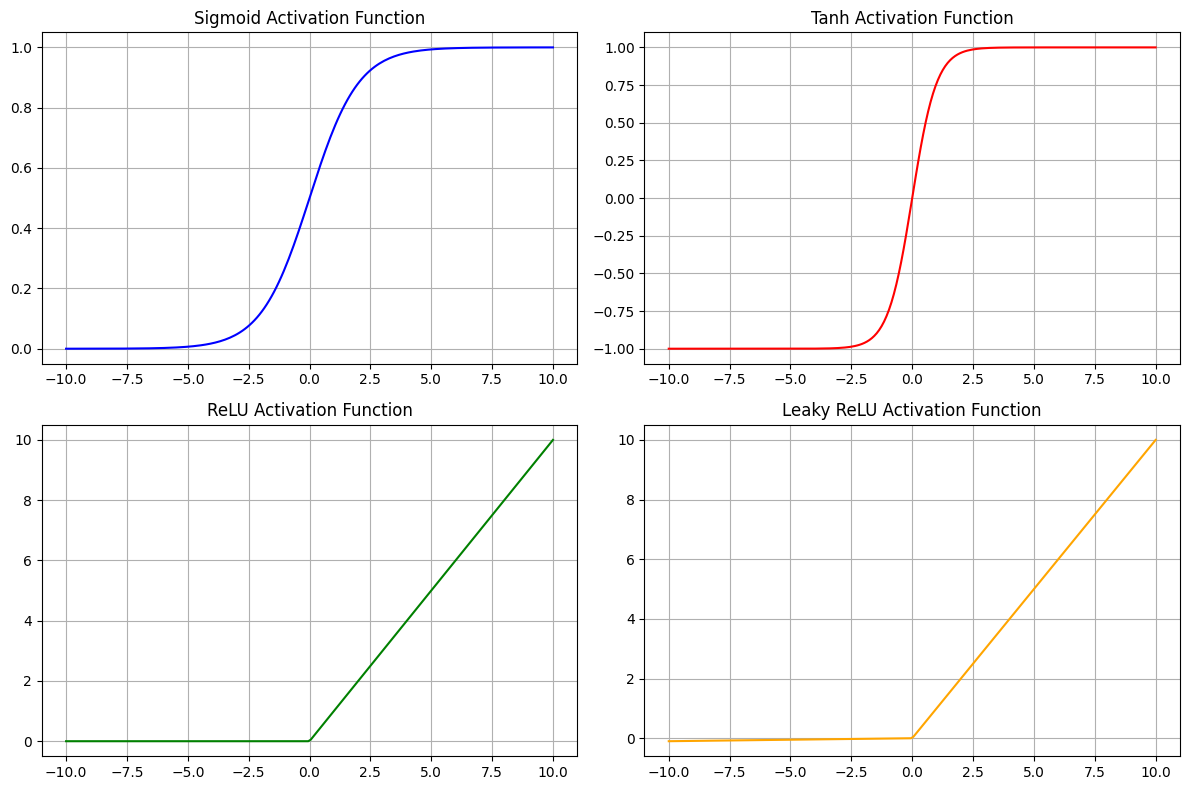

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of values
x = np.linspace(-10, 10, 200)

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Tanh Activation Function
def tanh(x):
    return np.tanh(x)

# ReLU Activation Function
def relu(x):
    return np.maximum(0, x)

# Leaky ReLU Activation Function
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

# Plot the activation functions
plt.figure(figsize=(12, 8))

# Sigmoid
plt.subplot(2, 2, 1)
plt.plot(x, sigmoid(x), label="Sigmoid", color="blue")
plt.title("Sigmoid Activation Function")
plt.grid()

# Tanh
plt.subplot(2, 2, 2)
plt.plot(x, tanh(x), label="Tanh", color="red")
plt.title("Tanh Activation Function")
plt.grid()

# ReLU
plt.subplot(2, 2, 3)
plt.plot(x, relu(x), label="ReLU", color="green")
plt.title("ReLU Activation Function")
plt.grid()

# Leaky ReLU
plt.subplot(2, 2, 4)
plt.plot(x, leaky_relu(x), label="Leaky ReLU", color="orange")
plt.title("Leaky ReLU Activation Function")
plt.grid()

plt.tight_layout()
plt.show()


# Loss functions

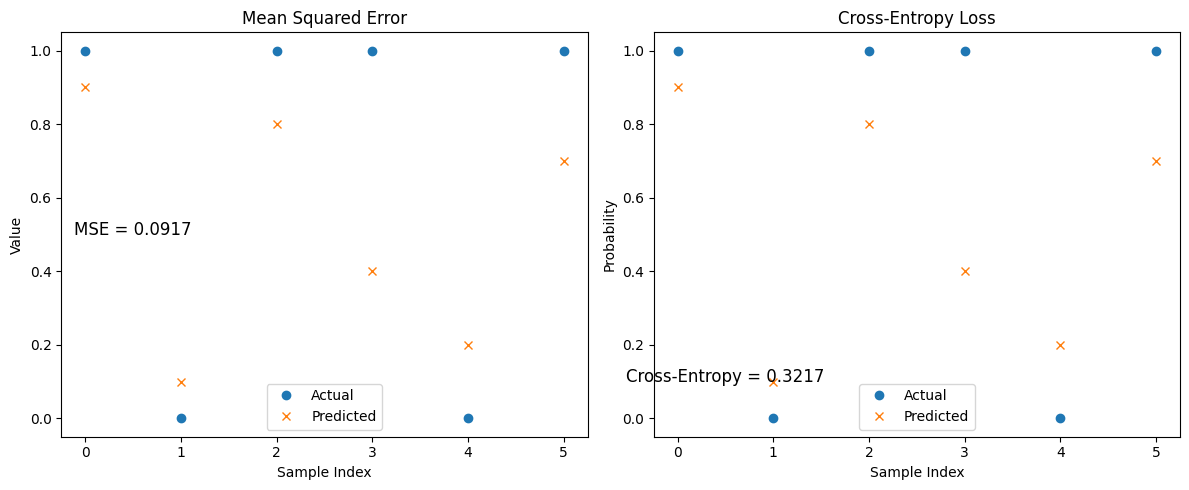

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Sample actual and predicted values
actual = np.array([1, 0, 1, 1, 0, 1])
predicted = np.array([0.9, 0.1, 0.8, 0.4, 0.2, 0.7])

# Calculate Mean Squared Error
mse = ((actual - predicted) ** 2).mean()

# Calculate Cross-Entropy Loss
# Avoid division by zero
eps = 1e-15
predicted = np.clip(predicted, eps, 1 - eps)
cross_entropy = -(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted)).mean()

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# MSE plot
ax[0].plot(actual, 'o', label='Actual')
ax[0].plot(predicted, 'x', label='Predicted')
ax[0].set_title('Mean Squared Error')
ax[0].set_xlabel('Sample Index')
ax[0].set_ylabel('Value')
ax[0].legend()
ax[0].text(0.5, 0.5, f'MSE = {mse:.4f}', fontsize=12, ha='center')

# Cross-Entropy plot
ax[1].plot(actual, 'o', label='Actual')
ax[1].plot(predicted, 'x', label='Predicted')
ax[1].set_title('Cross-Entropy Loss')
ax[1].set_xlabel('Sample Index')
ax[1].set_ylabel('Probability')
ax[1].legend()
ax[1].text(0.5, 0.1, f'Cross-Entropy = {cross_entropy:.4f}', fontsize=12, ha='center')

# Show the plot
plt.tight_layout()
plt.show()


# Neural Network from scratch

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [23]:
# In this cell, we generate some synthetic data for our 'neural network'

# Set number of samples for each class
num_samples_per_class = 1000

# Generate 'negative' class samples: 2D points from a multivariate normal distribution
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],  # the mean of the normal distribution
    cov=[[1, 0.5],[0.5, 1]],  # the covariance matrix
    size=num_samples_per_class)  # the number of samples to generate

# Generate 'positive' class samples: 2D points from a different multivariate normal distribution
positive_samples = np.random.multivariate_normal(
    mean=[1, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

# Stack the negative and positive samples to create the input data
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# Generate the targets: 0 for 'negative' class, 1 for 'positive' class
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

In [24]:
inputs.shape, targets.shape

((2000, 2), (2000, 1))

Text(0.5, 1.0, 'synthetic data')

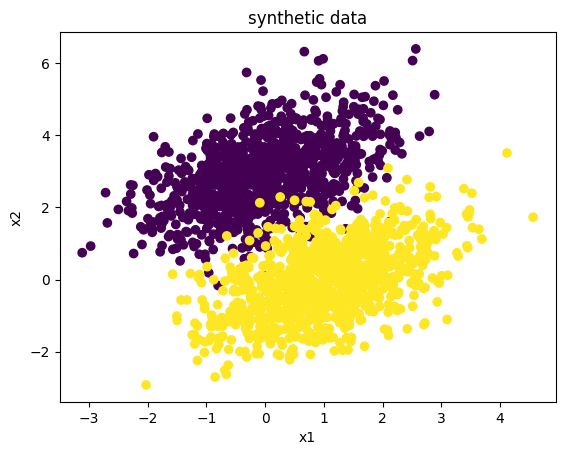

In [25]:
# Plot the input data: negative samples in one color and positive samples in another color
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])

# Display the plot
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('synthetic data')

Loss at step 0: 6.0972
Loss at step 1: 1.5325
Loss at step 2: 0.7013
Loss at step 3: 0.5227
Loss at step 4: 0.4606
Loss at step 5: 0.4217
Loss at step 6: 0.3892
Loss at step 7: 0.3602
Loss at step 8: 0.3338
Loss at step 9: 0.3097
Loss at step 10: 0.2876
Loss at step 11: 0.2675
Loss at step 12: 0.2490
Loss at step 13: 0.2322
Loss at step 14: 0.2167
Loss at step 15: 0.2025
Loss at step 16: 0.1896
Loss at step 17: 0.1777
Loss at step 18: 0.1668
Loss at step 19: 0.1568
Loss at step 20: 0.1477
Loss at step 21: 0.1393
Loss at step 22: 0.1316
Loss at step 23: 0.1246
Loss at step 24: 0.1181
Loss at step 25: 0.1122
Loss at step 26: 0.1068
Loss at step 27: 0.1018
Loss at step 28: 0.0972
Loss at step 29: 0.0931
Loss at step 30: 0.0892
Loss at step 31: 0.0857
Loss at step 32: 0.0825
Loss at step 33: 0.0795
Loss at step 34: 0.0768
Loss at step 35: 0.0744
Loss at step 36: 0.0721
Loss at step 37: 0.0700
Loss at step 38: 0.0681
Loss at step 39: 0.0663


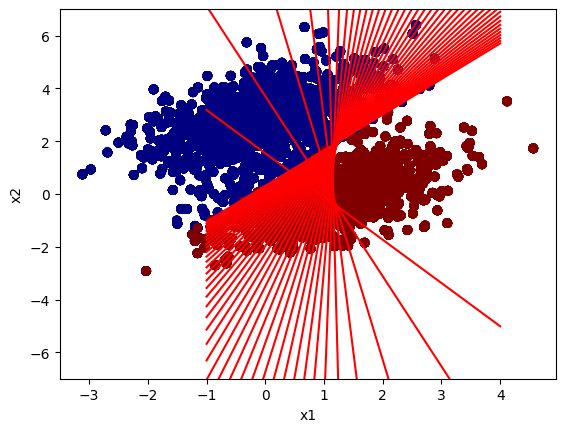

In [26]:
# Define the dimensions of the input and output
input_dim = 2
output_dim = 1

# Initialize the weights and biases for our model
W = tf.Variable(initial_value=tf.random.uniform(minval =0, maxval = 1,
                                                shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# The model: a simple linear model
def model(inputs):
    # Here our model is y = W1*x1 + W2*x2 + b.
    return tf.matmul(inputs, W) + b

# Define the loss function: square loss
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)  # Squared error
    return tf.reduce_mean(per_sample_losses)   # Mean squared error

# Define the learning rate for our optimization
learning_rate = 0.05

# Training step function
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)  # Forward propogation
        loss = square_loss(targets, predictions)  # Calculating loss
    # Get gradients of loss wrt the weights and biases
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    # Update the weights and biases
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

# Training loop
for step in range(40):
    # Run one training step and get the loss
    loss = training_step(inputs, targets)
    predictions = model(inputs)

    # Plotting the decision boundary and the data
    x1 = np.linspace(-1, 4, 100)
    x2 = - W[0] /  W[1] * x1 + (0.5 - b) / W[1]

    plt.plot(x1, x2, "-r")
    plt.ylim([-7,7])
    plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5, cmap = 'jet')
    plt.xlabel('x1')
    plt.ylabel('x2')
    # plt.show()

    print(f"Loss at step {step}: {loss:.4f}")

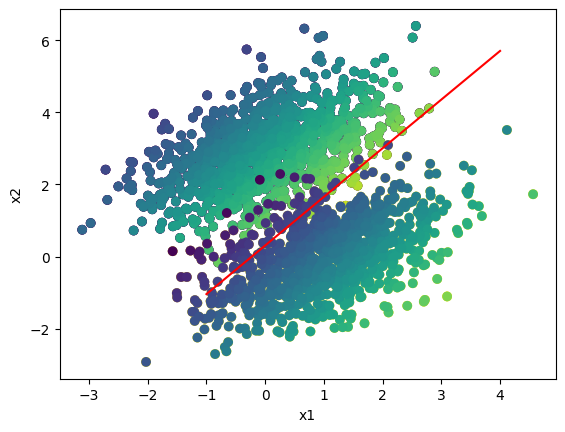

In [27]:
# This line generates 100 evenly spaced numbers over the interval [-1, 4].
# These will serve as our x1 values (horizontal axis) when plotting the decision boundary.
x1 = np.linspace(-1, 4, 100)

# This line calculates the corresponding x2 (vertical axis) values for the decision boundary.
# It's using the formula of the decision boundary we derived in the previous steps.
x2 = - W[0] /  W[1] * x1 + (0.5 - b) / W[1]

plt.plot(x1, x2, "-r") # This plots the decision boundary. The '-r' argument makes the line red.

plt.xlabel('x1') # This sets the label for the x-axis.
plt.ylabel('x2') # This sets the label for the y-axis.


# This plots the individual data points.
# The color of the points is determined by the model's predictions (greater than 0.5 or not).
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] - targets[:, 0])

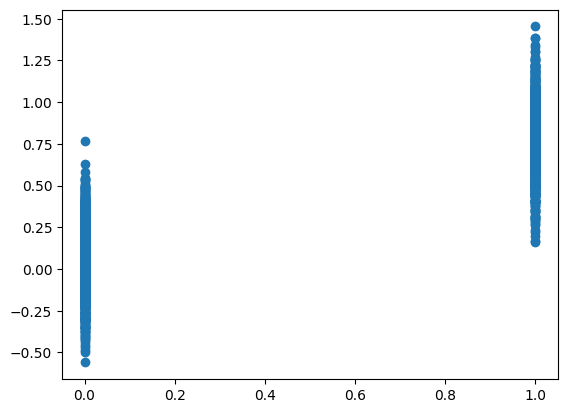

In [28]:
plt.scatter(targets[:, 0], predictions[:, 0])

Confusion Matrix: 
[[990  10]
 [ 85 915]]


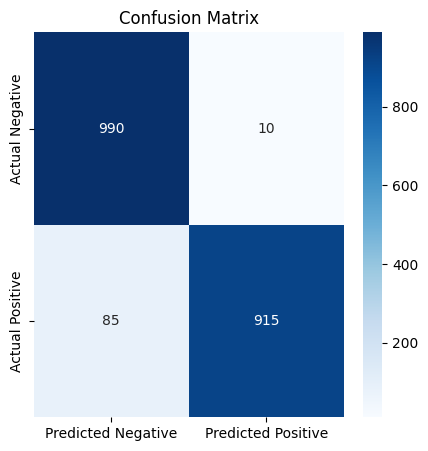

In [29]:
# Import necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# Get the model predictions
predictions = model(inputs)

# Convert targets into a flat array
targets_array = targets.flatten()

# Convert predictions into a flat array
predictions_array = predictions.numpy().flatten()

# Thresholding the predictions at 0.5 (This is equivalent to choosing 0.5 as the decision boundary)
binary_predictions = (predictions_array > 0.5).astype(int)

# Compute the confusion matrix
conf_matrix = confusion_matrix(targets_array, binary_predictions)
print("Confusion Matrix: ")
print(conf_matrix)

# Import necessary library
import seaborn as sns
import pandas as pd

# Convert Confusion Matrix to DataFrame for better visual
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

ROC AUC: 0.994544


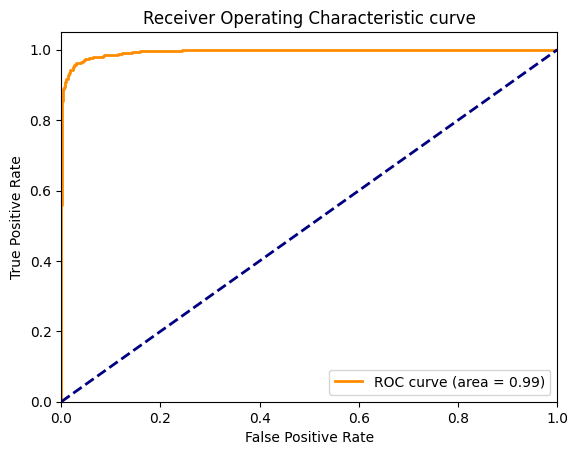

In [30]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(targets_array, predictions_array)

# Compute ROC AUC
roc_auc = roc_auc_score(targets_array, predictions_array)
print(f"ROC AUC: {roc_auc}")

# Plot ROC curve
plt.figure()
lw = 2  # line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

# First look at Keras

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Import the MNIST dataset from tensorflow.keras.datasets
from tensorflow.keras.datasets import mnist

# Load the dataset. The MNIST dataset is divided into a set of 60,000 training images
# and a set of 10,000 testing images. Each image is represented as 28 x 28 pixels.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Print the shape of the training set. This will output (60000, 28, 28), indicating
# there are 60,000 images in the training set, each image being 28 x 28 pixels.
print(train_images.shape)

# Print the length of the training labels. This will output 60000, indicating there
# are 60,000 labels in the training set.
print(len(train_labels))
print('The first five training labels are: ', train_labels[0:5])

(60000, 28, 28)
60000
The first five training labels are:  [5 0 4 1 9]


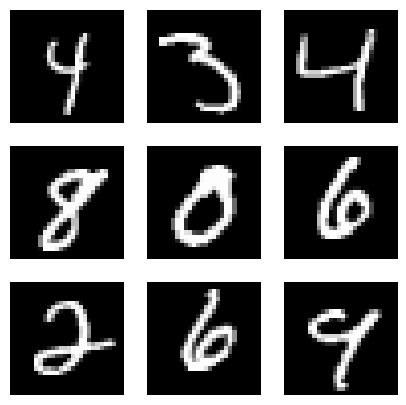

In [33]:
# Import the matplotlib
import matplotlib.pyplot as plt

# Create a 3x3 grid of subplots. `fig` represents the whole figure, and `ax` is
# an array containing each subplot (or "axes"). The `figsize` parameter sets
# the size of the figure.
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (5,5))

# reproducibility.
np.random.seed(0)

# Generate an array of 9 random indices, each between 0 and 99 (inclusive).
# The `choice` function randomly selects 9 values from the array produced by
# np.arange(100). `replace=False` ensures that each value is unique (no repeats).
inds = np.random.choice(np.arange(100), size = 9, replace = False)

# Loop through each of the axes (i.e., each subplot in our 3x3 grid).
# `enumerate` is a built-in function of Python.
# (here, `i` is the counter, and `ax0` is the current subplot).
for i, ax0 in enumerate(ax.flatten()):
    # Display an image from the training set on each subplot. The index of the
    # image is taken from our randomly generated list of indices (`inds`). The
    # `cmap='gray'` parameter means that the images will be displayed in grayscale.
    ax0.imshow(train_images[inds[i]], cmap = 'gray')

    # Remove the axes from each subplot for a cleaner look.
    ax0.axis('off')


In [34]:
# Keras is a user-friendly
# neural network library written in Python.
from tensorflow import keras
from tensorflow.keras import layers

# Define the architecture of the neural network. We're using a sequential model,
# which is a linear stack of layers. The model has two layers:
#   1. A dense (fully connected) layer with 512 neurons and ReLU activation.
        # Here we use the "late variable creation"
#   2. Another dense layer with 10 neurons (one for each class) and softmax activation,
#      which will output a probability distribution over the 10 classes.
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model. This is where we specify the optimizer, loss function, and metrics
# that we'll use for training. Here, we're using RMSprop as the optimizer,
# sparse_categorical_crossentropy as the loss function, and accuracy as the metric.
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Preprocess the training images: flatten them into vectors and scale the pixel values
# to be between 0 and 1. Each image originally is 28x28 pixels, so after reshaping,
# each image becomes a 1D array of 784 (28*28) elements.
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# Do the same preprocessing for the test images.
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255


In [35]:
# Train the model for a specified number of epochs

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.2614 - accuracy: 0.9244
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1071 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9784
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0512 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0379 - accuracy: 0.9890


313/313 [==============================] - 0s 1ms/step
Shape of predictions:  (10000, 10)


(-0.5, 27.5, 27.5, -0.5)

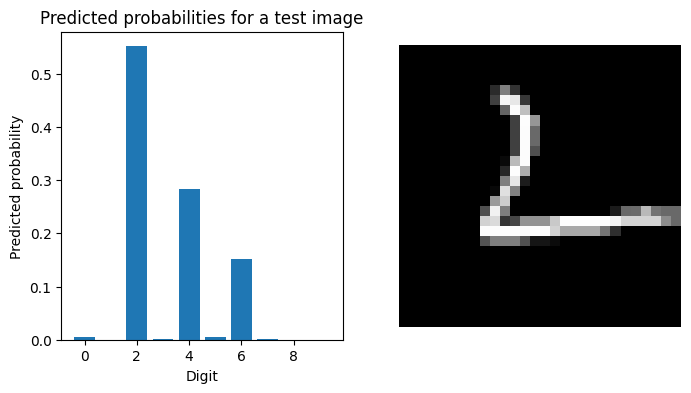

In [36]:
# Predict the labels for all test images

ni = 1224
test_digits = test_images
predictions = model.predict(test_digits)

# Print the shape of the predictions array
print('Shape of predictions: ', predictions.shape)

# Initialize a subplot with 2 columns: one for the predicted probabilities and one for the actual image
fig, ax = plt.subplots(ncols = 2, figsize=(8, 4))

# In the first subplot, plot the prediction probabilities for a test image
ax[0].bar(range(10), predictions[ni])
ax[0].set_title("Predicted probabilities for a test image")
ax[0].set_xlabel("Digit")
ax[0].set_ylabel("Predicted probability")

# In the second subplot, show the actual image corresponding to these predictions
ax[1].imshow(test_images[ni].reshape([28,28]), cmap='gray')
ax[1].axis('off')

In [37]:
# Get the predicted class labels: the class with the highest probability for each image
labels_pred = predictions.argmax(axis = 1)
# Print the predicted labels for the first 10 images
print(labels_pred[0:10])

# Evaluate the model on the test set - this gives us our final accuracy and loss values
test_loss, test_acc = model.evaluate(test_images, test_labels)
# Print the test accuracy
print(f"test_acc: {test_acc}")

[7 2 1 0 4 1 4 9 5 9]
313/313 [==============================] - 1s 2ms/step - loss: 0.0661 - accuracy: 0.9798
test_acc: 0.9797999858856201


In [38]:
print(train_images.ndim )
print(train_images.shape)
print(train_images.dtype)

2
(60000, 784)
float32


# Simple NN regression

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Let's create a simple function and calculate both the ground truth answer and create some data.

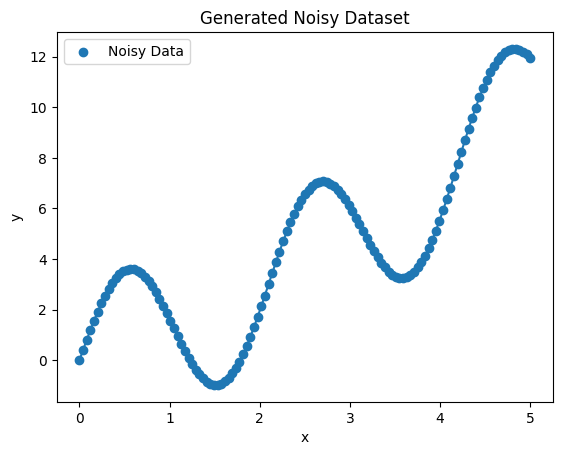

In [40]:
# Define the function parameters
a, b, c = 1, 0.2, 3

# Generate noisy data
x_data = np.linspace(0, 5, 125)
noise = np.random.normal(0, 0.005, size=x_data.shape)
y_truth = a * x_data + b * x_data**2 + c * np.sin(3*x_data)
y_data = y_truth + noise

# Plotting the noisy data
plt.scatter(x_data, y_data, label='Noisy Data')
plt.plot(x_data, y_truth)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Noisy Dataset')
plt.show()

Now, let's define a simple NN model

In [41]:
# Model definition
model = Sequential([
    Dense(32, activation='tanh', input_dim=1),
    Dense(32, activation='tanh'),
    Dense(128, activation='relu'),
    Dense(8, activation='linear'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

Reshape the data and train the model

In [42]:
# Reshape data for training
X_train = x_data.reshape(-1, 1)
Y_train = y_data.reshape(-1, 1)

# Train the model
model.fit(X_train, Y_train, epochs=1000, verbose=1)

Epoch 1/1000
4/4 [==============================] - 2s 4ms/step - loss: 31.1055
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 23.3064
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 17.4407
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 12.7967
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 9.3877
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 8.7787
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 9.4431
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 9.5330
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 8.9159
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 8.5538
Epoch 11/1000
4/4 [==============================] - 0s 3ms/step - loss: 8.3985
Epoch 12/1000
4/4 [==============================] - 0s 4ms/step - loss: 8.3581
Epoch 13/1000
4/4 [==========================

And see how this model behaves on the test data

10/10 [==============================] - 0s 5ms/step


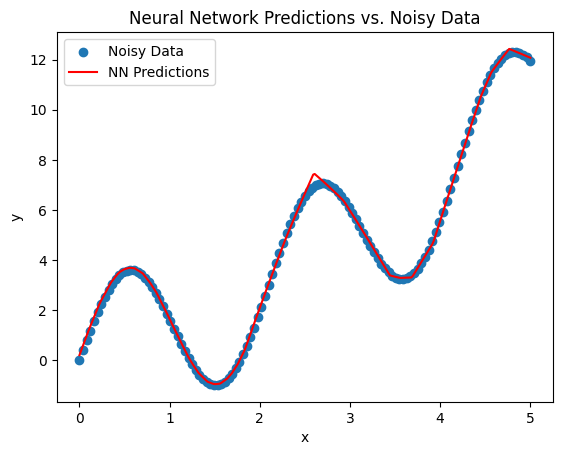

In [43]:
# Generate test data
x_test = np.linspace(0, 5, 300)
y_test = model.predict(x_test)

# Plotting the predictions against the noisy data
plt.scatter(x_data, y_truth, label='Noisy Data')
plt.plot(x_test, y_test, color='red', label='NN Predictions')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Predictions vs. Noisy Data')
plt.show()

In [44]:
model.*?

/usr/local/lib/python3.10/dist-packages/IPython/utils/wildcard.py:70: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  ns[key] = getattr(obj, key)
/usr/local/lib/python3.10/dist-packages/IPython/utils/wildcard.py:70: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  ns[key] = getattr(obj, key)


Experiment how the NN will behave if we change the numbe rof layers, neurons in the layers, and the activation fucntions.

# Ensemble NNs and uncertainties

Model  0
Model  1
Model  2
Model  3
Model  4
Model  5
Model  6
Model  7
Model  8
Model  9
7/7 [==============================] - 0s 2ms/step


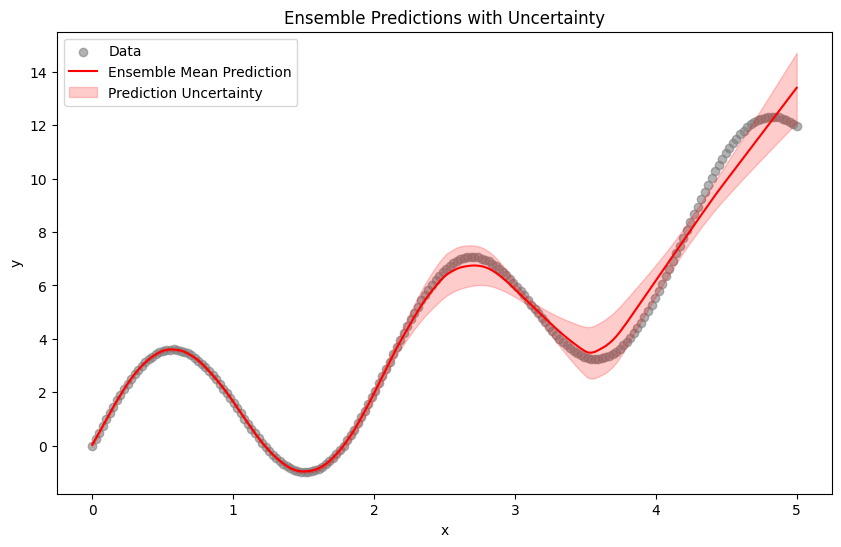

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate synthetic data
a, b, c = 1, 0.2, 3
x_data = np.linspace(0, 5, 200)
noise = np.random.normal(0, 0.005, size=x_data.shape)
y_data = a * x_data + b * x_data**2 + c * np.sin(3*x_data) + noise

# Function to create a model
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(1,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Create an ensemble of models
num_models = 10
models = [create_model() for _ in range(num_models)]

# Train each model in the ensemble
for i, model in enumerate(models):
    print("Model ", i)
    model.fit(x_data, y_data, epochs=500, verbose=0)

# Predict using the ensemble and calculate mean and uncertainty (standard deviation)
predictions = np.array([model.predict(x_data) for model in models])
mean_predictions = np.mean(predictions, axis=0)
uncertainty = np.std(predictions, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='gray', alpha=0.6, label='Data')
plt.plot(x_data, mean_predictions, color='red', label='Ensemble Mean Prediction')
plt.fill_between(x_data, (mean_predictions - uncertainty).flatten(), (mean_predictions + uncertainty).flatten(), color='red', alpha=0.2, label='Prediction Uncertainty')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ensemble Predictions with Uncertainty')
plt.legend()
plt.show()


# NN Regression in 2D

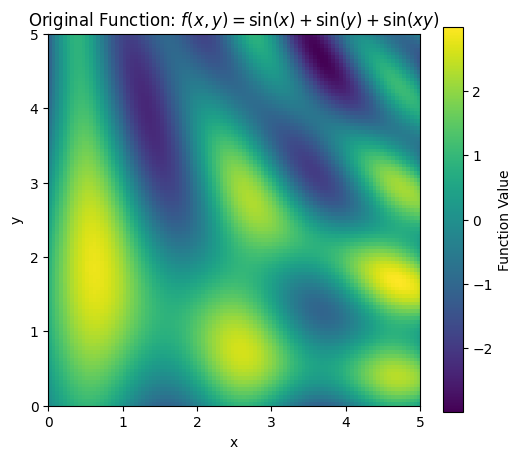

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(3*X) + np.sin(Y) + np.sin(X*Y)

# Visualize the original function
plt.figure(figsize=(6, 5))
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis')
plt.colorbar(label='Function Value')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Function: $f(x, y) = \sin(x) + \sin(y) + \sin(xy)$')
plt.show()


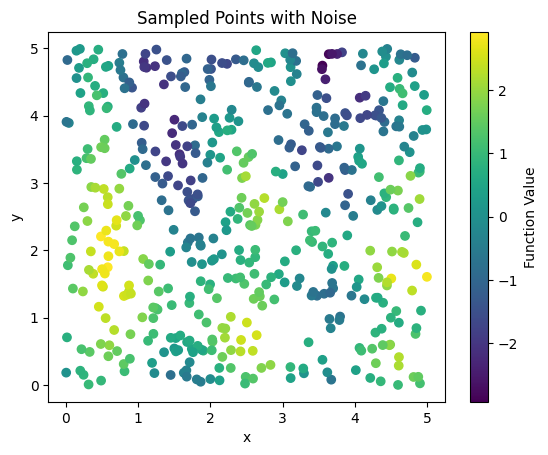

In [47]:
# Sampling points
num_samples = 500
x_sample = np.random.uniform(0, 5, num_samples)
y_sample = np.random.uniform(0, 5, num_samples)
z_sample = np.sin(3*x_sample) + np.sin(y_sample) + np.sin(x_sample*y_sample) + np.random.normal(0, 0.1, num_samples)

# Visualizing sampled points
plt.scatter(x_sample, y_sample, c=z_sample, cmap='viridis')
plt.colorbar(label='Function Value')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sampled Points with Noise')
plt.show()


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(2,)),
    Dense(4, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Prepare data for training
train_data = np.vstack((x_sample, y_sample)).T
train_labels = z_sample

# Train the model
model.fit(train_data, train_labels, epochs=1000, verbose=0)

313/313 [==============================] - 0s 1ms/step


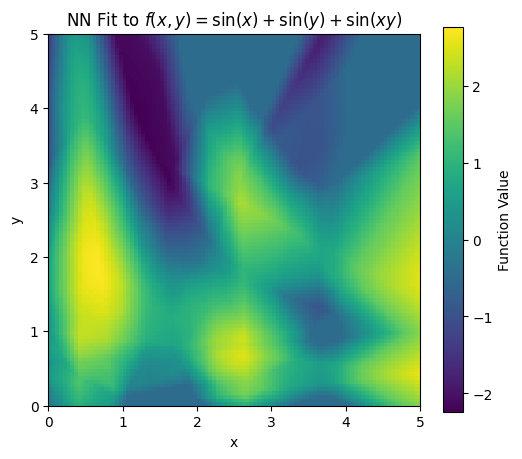

In [49]:
# Generate a prediction grid
x_test, y_test = np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 5, 100))
z_test = model.predict(np.hstack((x_test.reshape(-1, 1), y_test.reshape(-1, 1)))).reshape(100, 100)

# Visualizing NN fit results
plt.figure(figsize=(6, 5))
plt.imshow(z_test, extent=[0, 5, 0, 5], origin='lower', cmap='viridis')
plt.colorbar(label='Function Value')
plt.xlabel('x')
plt.ylabel('y')
plt.title('NN Fit to $f(x, y) = \sin(x) + \sin(y) + \sin(xy)$')
plt.show()


313/313 [==============================] - 0s 1ms/step


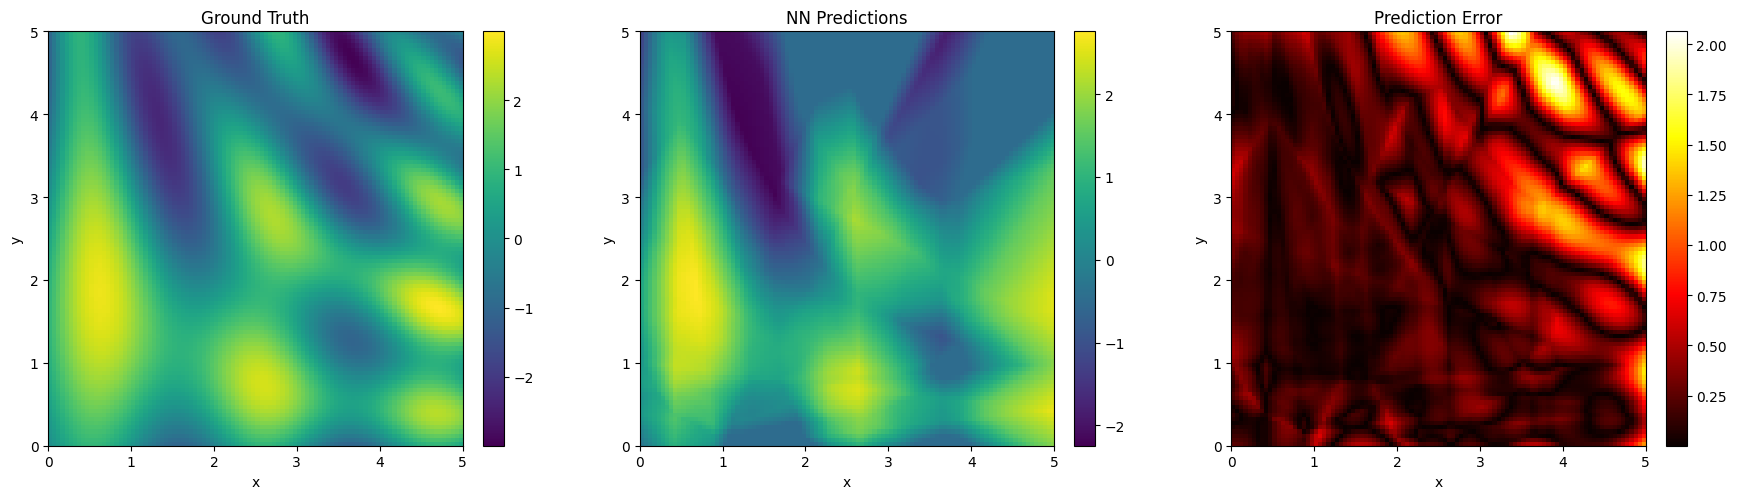

In [50]:
# Assuming the necessary imports, model definition, and training have been completed as described.

# Ground truth function evaluation on the grid
Z_ground_truth = np.sin(3*X) + np.sin(Y) + np.sin(X*Y)

# Predictions from the neural network
Z_predictions = model.predict(np.hstack((X.reshape(-1, 1), Y.reshape(-1, 1)))).reshape(100, 100)

# Calculating the error
Z_error = np.abs(Z_ground_truth - Z_predictions)

# Plotting ground truth, predictions, and error side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Ground Truth
img0 = axs[0].imshow(Z_ground_truth, extent=[0, 5, 0, 5], origin='lower', cmap='viridis')
fig.colorbar(img0, ax=axs[0], fraction=0.046, pad=0.04)
axs[0].set_title('Ground Truth')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# Predictions
img1 = axs[1].imshow(Z_predictions, extent=[0, 5, 0, 5], origin='lower', cmap='viridis')
fig.colorbar(img1, ax=axs[1], fraction=0.046, pad=0.04)
axs[1].set_title('NN Predictions')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

# Error
img2 = axs[2].imshow(Z_error, extent=[0, 5, 0, 5], origin='lower', cmap='hot')
fig.colorbar(img2, ax=axs[2], fraction=0.046, pad=0.04)
axs[2].set_title('Prediction Error')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')

plt.tight_layout()
plt.show()